In [ ]:
# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd

# `Pandas` for tidy data management

Managing your data is central to any data analysis you will ever do. You will always need to sort, subset, and manipulate your data in order to extract tables and figures. 

Keeping your data "tidy" means having a simple set of rules for how you store your data. This is an idea that started in the world of `R`, another programming language that we will cover later, and spread to python with `pandas`.

What are these rules?

- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

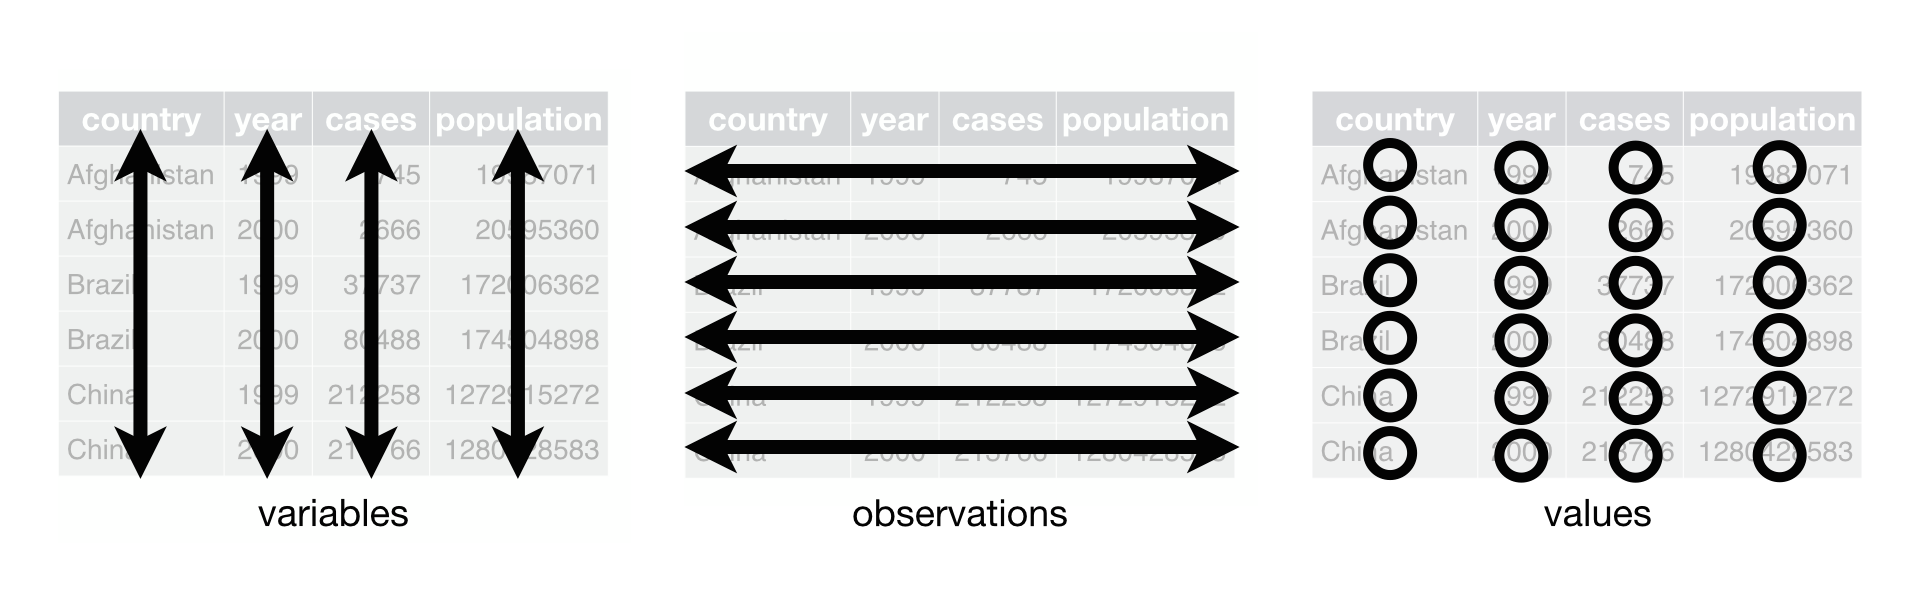

Having uniform rules for our data structure means that functions have a consistency that makes it easier to learn and use. Keeping data in columns also lets numpy's vectorized functions shine. 

`Pandas` is a "wrapper" around NumPy - `pandas` methods use NumPy functions and objects, but makes things tidier and simpler. The trade-off is that `pandas` is sometimes slower.



### `Pandas` DataFrames and Series
`Pandas` introduces two new ways of collecting variables:

 - Series: A named list of values, all of the same type
 - DataFrame: An Excel spreadsheet in computer memory made by bundling Series. 
     - Each column is a different Series of data
     - Each row is a separate observation or sample.

Note that the definition of a DataFrame enforces the tidy data rules from above.

We are going to spend a lot more time with DataFrames than Series, so let's start there.

#### Global options for viewing data

I find excessive significant digits really distracting. You change many settings like precision globally with pd.set_option(). Let's check the default number of significant digits (precision) and then change it to 2. 

In [ ]:
#Default options for DataFrames can be adjusted
pd.get_option(None)

In [ ]:
pd.set_option(None)
# The default number of columns to show is 20. Change it to 10.
pd.set_option(None)

### Import data into a DataFrame
Let's import some data to work with. 

`Pandas` provides simple tools for importing from Excel, csv, or any other common data format:
 - `read_csv`
 - `read_excel`
 - `read_clipboard`
 - `read_sql`
 
We'll start by importing a table of gene expression data using the `pandas` function `pd.read_csv()` and a table of metadata using `pd.read_excel()`.

This dataset comes from an [RNAseq experiment comparing melanoma cell lines from 2017](https://www.nature.com/articles/s41467-017-02353-y) published in Nature Communications.

In [ ]:
# Inspect the `pandas` functions 
#pd. 

In [ ]:
# Import comma-seperated data from a text file
df = pd.read_csv('data\GSE88741-expression.csv', index_col=0)

In [ ]:
# Like arrays, dataframes store information about their shape at df.shape
print ("Dimensions of DataFrame:",None,"\n")

In [ ]:
# Take a look at `df` using df.head()
None

Notice that the gene names are used as the index names.

Can you see what's wrong with the table above?

Check the rules for tidy data.

Here each row is a variable and each column is an observation. We can fix that by transposing the DataFrame

In [ ]:
df = df.None
df.head(12)

We can also import directly from Excel files. Let's bring in the metadata for these samples.

In [ ]:
# Bring in metadata from Excel
meta = pd.read_excel("data/GSE88741-metadata.xlsx", index_col=1)
meta

The Sample Titles here are way more informative than the 'GSM...' names in our data table. The indices aren't accessed using square brackets. Instead pandas stores index names at df.index and df.columns.

Let's extract the Sample Titles and use them to replace the row indices in our data df.

In [ ]:
# Extract the Sample Titles and use them to replace the ugly GSM names
samples = meta.None
df.None = samples
df.head()

The `sample` variable we just made is a single column of a DataFrame, which is a `pandas` series. There are functions that are specific to Series. Let's use Series.str, which lets us operate on the strings in the series to remove the last two characters from each Sample Title to get the name of the cell line. We can then add that to the meta DataFrame.

In [ ]:
# Let's also make a new metadata column with cell line names
# Remove the last two characters from each sample name
samples = samples.str[:-2]
meta['cell_line'] = samples

Recall that while each column of a DataFrame must be one data type, you can store different types of data in separate columns. 

Let's merge our meta and data into a single DataFrame using concat().


In [ ]:
melanoma_df = pd.concat([meta, df], axis=1)

# Check the new size and shape
None
None

In [ ]:
# Check what the DataFrame looks like
None

## Getting and setting data in a DataFrame

Lists, tuples, and ndarrays all use the index numbers for getting and setting data within the collection. Dictionaries can only use their 'key' values. 

Both types of sorting can be done in `pandas` DataFrames, but that can lead to confusion. Imagin you have a row with the observations for day 2 of an experiment that you've named "2", but it happens to be the fourth row in your DataFrame?

To keep things clear pandas has two primary ways of slicing data:

 - df.iloc : search by **index** number, like lists and ndarrays
 - df.loc  : search by index name, like dictionaries

You can also access individual columns by name using either `df.column_name1` or `df['column_name1']`.
Let's try accessing data from 'melenoma_df'.

In [ ]:
# Get the first five genes from the first three samples

# Note that the row names count as the zero index
# But not column names...
melanoma_df.iloc[None]

In [ ]:
# The values for the gene 'A2M'
melanoma_df[None]

# This is the same as melanoma_df.A2M
melanoma_df[None] == None

In [ ]:
# Get all rows from primary melanocyte samples
primary_indices = melanoma_df.Stage == 'primary melanocytes'
primary_melanocytes = None
primary_melanocytes

In [ ]:
# If we want to get a list of cell lines we use the Series.isin() method
None(['FM', 'UACC_62'])

In [ ]:
# Now limit that to just the metadata
primary_melanocytes.loc[None]

# Functions to make DataFrames and arrays shine


Pandas and NumPy come with a [large library of functions](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html#) that work with arrays. 

We will cover a few of the most useful functions here, and we will see many more as the class goes on.

For this class we will use:
 - Some magic functions
 - computation methods min(), var(), mean(), etc.
 - sort_values()
 - groupby()
 - describe()
 - random.

#### Magic functions (base python)

Python has a set of "magic" commands that work on memory and the operating system. Not surprisingly, you can easily cause things to crash doing that, so magic commands limit your ability to do damage by only giving you a few powerful functions. All magic functions start with a "%" symbol. 

We will run into a few more of these later, but for now I just want to show you one really useful magic function: `%whos`.

You may find that you lose track of the variables you've created so far. Let's see whats there with `%whos`

In [ ]:
# This will show us every variable in memory
%whos

In [ ]:
# This will just show us every DataFrame
%whos DataFrame

In [ ]:
#If you're curious, here's how to list all available magic functions
%lsmagic

#### NumPy and Pandas built in methods for ndarrays and DataFrames

There are hundreds of functions and built in methods for performing calculations with ndarrays and DataFrames. Let's try a few out on melanome_df.

In [ ]:
# First calculate the overall variance with df.var() 
overall_variance = None
overall_variance
type(overall_variance)

# We can do the same with df.mean(), .df.min, etc.

In [ ]:
# Sort this Series and select the 20 genes with the largest variance
overall_variance.None
topvar = overall_variance[None]
topvar

In [ ]:
# We want to use the gene names, not their variance, to filter the columns of melanoma_df
topvar.index

In [ ]:
# Now we can use that Series with melanoma_df.loc to make a subtable
topvartable = melanoma_df.loc[None]
topvartable

In [ ]:
# Pandas has a built in method for calculating basic statistics: df.describe()
None

#### Grouping samples 

Our sample melanoma dataset has three replicates for each cell line. Those strains can be grouped together with 
```python 
df.groupby(by = ['column_name])`
```

However when we do that we get something a bit odd.

In [ ]:
# Make a new variable by grouping melanoma_df by cell line
mel_by_cel = None
mel_by_cel

We have made a "DataFrameGroupBy" object. What is this?

This is an iterator, an object that iterates over a function, offering it one block of data at a time. To generate the mean of each gene for each cell line, we use the following:

In [ ]:
melanoma_df.groupby('cell_line'). None

 We can similarly calculate the mean, min, max, variance, and a host of other computational methods. 
 
***
### <font color=brown>Hands on practice</font>
1. Calculate the mean and variance per gene in `topvartable` across all samples
2. Make tables of the mean and variance of `topvartable` for each gene, grouped by cell line.
3. Add the total row to each DataFrame using pd.concat()

In [ ]:
# Mean and variance of all the samples
overall_mean = None
overall_variance = None

# Mean and variance of samples grouped by cell line
mean_byline = None
variance_byline = None

# Concatenate the overal and grouped data together
mean_byline = None
variance_byline = None

In [ ]:
mean_byline.head()

#### Random number generators

Random numbers are a good way of simulating expected results or sampling a random subset of data. 

NumPy stores these functions in the np.random sub-library. That makes it a little confusing as you'll have to repeat yourself a bit.

Random numbers can be taken from a uniform distribution (all numbers equally possible) or from a normal distribution (a 'bell-shape' centered on the mean) or many other distributions we won't cover here. 

For the rest of the class, try out these random number generators.

In [ ]:
# We will start by setting a random seed so that all our random variables match
np.random.seed(42)

In [ ]:
# A random integer with randint(start, stop(not included), number of values desired)
np.random.None(1, 11, 9)

In [ ]:
# Random integers between 0 and 10 in a 2 by 2 array
np.random.randint(None)

In [ ]:
# Three random floating-point number between 0 and 1
np.random.None

In [ ]:
# Normal distribution with mean=0 and variance=1 in a 1 by 5 array
np.random.randn(None)

In [ ]:
# Pick 10 items from a given list, with equal probability
np.random.choice(['A', 'C', 'G', 'T', 'N'], size=10)  

# Pick 10 items from a given list with a predefined probability 'p'
np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1])

## Stats with scipy

The `scipy` library contains a larger range of mathematical functions. Like `numpy`, these are broken up into sublibraries. We will focus on the `scipy.stats` module. 



In [1]:
from scipy import stats

In [3]:
stats.ttest_ind(rvs1,rvs2)

NameError: name 'info' is not defined

***
## <font color=brown>Class 5 Homework</font>

For this homework you'll generate all of the data tables we will be using for plotting in Classes 6 and 7. 